# Computational Physics

## Assignment Week 11

### Group 3

1. Please download **demo_midpoint.zip** und unpack it. What is the purpose of the main script `demo_midpoint.py`? What conclusion can you make by running the script? 

2.  Write a function to that numerically estimates the integral
    $$
    A =\int^b_af (x)dx
    $$
    using the trapezoid rule. The simplest version of the trapezoid rule, which generally gives a very crude estimate, is
    $$
    A_0 = \frac{1}{2}h_0[f (a) + f (b)], \; h_0 = b - a
    $$
    This estimate for the integral can be refined by dividing the interval from $a$ to $b$ in two and performing the trapezoid rule on each interval. This process can be repeated as many times as needed until you get the desired precision, which you can estimate by requiring that the fractional difference between successive estimates $(A_i -A_{i-1})/A_i < \epsilon$, where $\epsilon$ might be some small number like 10^-8^.
    
    <img width=600 src=david_trapzoid_rule.png>
    
    Repeatedly applying the trapezoid rule gives the following succession of estimates
    $$\begin{aligned}
    A_1& = \frac{1}{2}h_1[f (a) + f (a + h_1)] + \frac{1}{2}h_1[f (a + h_1) + f (b)],\; h_1 = \frac{1}{2}h_0\\
    &= \frac{1}{2}h_1[f (a) + 2f (a + h_1) + f (b)]\\
    &= \frac{1}{2}A_0 + h_1f (a + h_1)\\
    A_2 &= \frac{1}{2}A_1 + h_2[f (a + h_2) + f (b - h_2)],\; h_2 = \frac{1}{2}h_1\\
    A_3& = \frac{1}{2}A_2 + h_3[f (a + h_3) + f (a + 3h_3) + f (a + 5h_5) + f (b-h_3)],\;h_3 = \frac{1}{2}h_2\\
    &\vdots\\
    A_n &= \frac{1}{2}A_{n-1} + h_n
    \sum_{i=1,3,\cdots}^{2^{n-1}}
    f (a + ih_n),\; h_n = \frac{1}{2}
    h_{n-1},\; \text{for }n\geq 1
    \end{aligned}$$
    Write a function that implements the trapezoid rule by first evaluating $A_0$, then $A_1$, $\cdots$ until $\epsilon$ is less than some preset tolerance. Note that to calculate $A_i$ , by using the previous result $A_{i-1}$, you need only to evaluate the function to be integrated $f (x)$ at the open circles in the preceding diagram, saving a great deal of computation.

    Try your trapezoid integration function on the following integrals
    and show that you get an answer within the specified tolerance of
    the exact value.
    
    (1) $\int_2^5 x^2 dx=39$
    
    (2) $\int_0^\pi \sin x dx =2$
    
    (3) $\int_0^{3.5} e^{-x^2}dx=\frac{\sqrt{\pi}}{2}\text{erf}(3.5)\simeq 0.8862262668989721$

3.  (1) Show that composite midpoint method for a double integral:  
    \begin{aligned}
    \int_a^b\int_c^d f(x,y)dydx &\approx h_x\sum_{i=0}^{n_x-1}h_y\sum_{j=0}^{n_y-1}f(x_i,y_j)\\
    &=h_xh_y\sum_{i=0}^{n_x-1}\sum_{j=0}^{n_y-1}f(a+\frac{h_x}{2}+ih_x,c+\frac{h_y}{2}+jh_y)
    \end{aligned}
    
(2) Write a code to implement the above algorithm. Please follow the following three test procedures: 
- (2.a) a test function to compare with hand calculations 
- (2.b) solving a problem without numerical errors. You can take
$$
\int_2^3\int_0^2 (2x+y)dxdy=9
$$
- (2.c Optional) demonstrating correct convergence rates. Computing convergence rates requires somewhat more tedious programming than for the previous tests, the algorithm typically goes like:    
for $i = 0, 1, 2, \cdots ,q$  
– $n_i = 2^{i+1}$  
– Compute integral with $n_i$ intervals   
– Compute the error $E_i$  
– Estimate $r_i$ as  
$$
r_{i-1}=-\frac{\ln(E_i/E_{i-1})}{\ln (n_i/n_{i-1})}
$$

Answer:  
(1) Here we use midpoint rule on both $x$ and $y$:

\begin{aligned}
\int_a^b\int_c^d f(x,y)dydx &\approx \int_c^d \sum_{i=0}^{n_x-1} f(a + h_x + \frac{h_x}{2}, y) h_x dy \\
& \approx h_xh_y\sum_{i=0}^{n_x-1}\sum_{j=0}^{n_y-1}f(a+\frac{h_x}{2}+ih_x,c+\frac{h_y}{2}+jh_y)
\end{aligned}


In [1]:
import numpy as np 
def MidPoint_2D(f, num_x, num_y, xlim, ylim):
    hx = (xlim[1] - xlim[0]) / num_x
    hy = (ylim[1] - ylim[0]) / num_y
    x_space = np.linspace(xlim[0] + hx/2, xlim[1] - hx/2, num_x)
    y_space = np.linspace(ylim[0] + hy/2, ylim[1] - hy/2, num_y)
    
    integral = 0
    for y in y_space:
        integral += np.sum(f(x_space, y) * hx * hy)
    return integral


(2.a) Use $f=xy$ as a test function and (0, 1) as the integral intervals, by hand calculation, the result is:
\begin{aligned}
\int_0^1 \int_0^1 xy \mathrm{d}x \mathrm{d}y &= \int_0^1 \frac{1}{2} y \mathrm{d}y \\
&= \frac{1}{4}
\end{aligned}


In [2]:
# by numerical method:
f_test = lambda x, y: x * y
integral = MidPoint_2D(f_test, 4, 4, [0,1], [0,1])
print(f"By numerical method, result is: {integral}")

print("\n\n(2.b) A solve a test function without error:")

By numerical method, result is: 0.25


(2.b) A solve a test function without error:


In [3]:
f_test_2 = lambda x, y: 2*x + y
integral = MidPoint_2D(f_test_2, 4, 4, [2,3], [0,2])
print(f"By numerical method, result is: {integral}")
print("P.S. the result of real value is actually 12, not 9.")

print("\n\n(2.c)")

By numerical method, result is: 12.0
P.S. the result of real value is actually 12, not 9.


(2.c)


(2.c) let test function as $f=x^{\frac{1}{2}}y^2$, and on the integral (0, 1), the real result is $\frac{2}{9}$

for $i = 0, 1, 2, \cdots ,q$  
– $n_i = 2^{i+1}$  
– Compute integral with $n_i$ intervals   
– Compute the error $E_i$  
– Estimate $r_i$ as  
$$
r_{i-1}=-\frac{\ln(E_i/E_{i-1})}{\ln (n_i/n_{i-1})}
$$

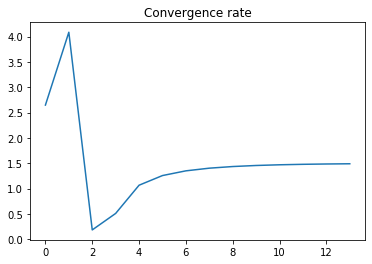

In [10]:
import matplotlib.pyplot as plt
f_test_3 = lambda x, y: x**(1/2) * y**2

integral = MidPoint_2D(f_test_3, 2, 2, [0,1], [0,1])
error_last = abs(integral - 2/9)

iter_num = 15

cov_rate = []
for i in range(1, iter_num):
    n_i = 2**(i+1)
    integral = MidPoint_2D(f_test_3, n_i, n_i, [0,1], [0,1])
    error = abs(integral - 2/9)
    cov_rate.append(-np.log(error/error_last) / np.log(2))
    error_last = error

plt.figure()
plt.title("Convergence rate")
plt.plot(range(iter_num - 1), cov_rate)
plt.show()


4. Please use Romberg integration to obtain a eighth-order accurate approximation to
    (1)
    $$
    \int_{-1}^1 \frac{dx}{1+x^2}=\frac{\pi}{2}
    $$   
    (2) $$
    \int_{-\infty}^{\infty}\frac{dx}{(e^x+x+1)^2+\pi^2}=\frac{2}{3}$$


5. Try with Gauss-Legendre formula to determine the integral using 5, 10, and 20 points: 
   $$
   I = \int_0^1 \frac{\sin t}{t}dt
   $$
   (Hint: You can find the weights and nodes on the website: https://dlmf.nist.gov/)